__(a)__ The process of generating data points from Gaussian Mixture is as follows:

First, we created arrays with given means and covariances, then we looped over the sample size = 500. In each iteration we took a random number between [0, 1) and found which quadrant this number corresponds to. ( All clusters have the same probability equal to 0. 25) We stored the data point from the multivariate normal distribution according to the mean and covariance of the corresponding quadrant. After obtaining all the data points in this way, we plotted them with matplotlib.

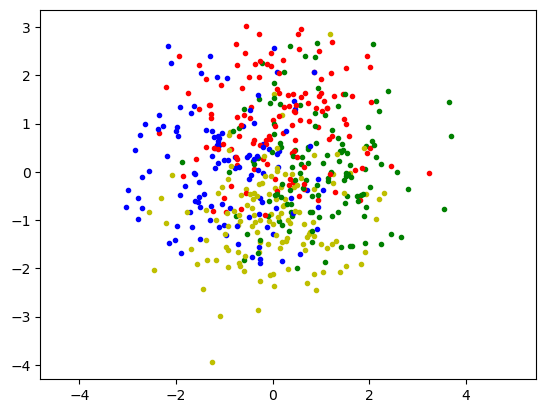

In [144]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(12345)
data_size = 500

def sample_datapoints(sample_size):
    color_dict = {0:'r', 1:'g', 2:'b', 3:'y'}
    
    means = np.array([[0, 1], [1, 0], [-1, 0], [0, -1]])
    covs = np.tile(np.identity(2), (4, 1, 1))
    pts = np.empty((sample_size, 2))
    
    for i in range(sample_size):
        r = np.random.uniform()
        k = (int)(r // 0.25)
        pts[i] = np.random.multivariate_normal(means[k], covs[k])
        plt.plot(pts[i, 0], pts[i, 1], '.', color = color_dict[k])
    
    
    plt.axis('equal')
    plt.show()
    
    return pts
    

data_points= sample_datapoints(data_size)

__(b)__ Below, we have implemented the necessary functions for the implementation of the K-means algorithm. <br>
* *distance*: Calculates the euclidean distance between two vectors.
* *initialize_centroids*: Randomly selects K data points among the generated data and these data points are used for the initialization of the centroids.
* *update_memberships*: Updates cluster memberships of our data points.
* *update_centroids*: Updates the coordinates of the centroids.
* *k_means*: Classifies the data points in K clusters using Lloyd's algorithm. 
* *plot_clusters*: Plots clusters after the k-means algorithm converged.

In [145]:
def distance(centroid, point):
    return np.linalg.norm(point - centroid)

def initialize_centroids():
    random_indices = np.random.randint(0, data_size, size=K)
    centroids = np.empty((K, 2))
    
    for i in range(K):
        centroids[i] = data_points[random_indices[i]]
    
    return centroids


def update_memberships():
    for i in range(data_size):
        min_distance = 10000   # random huge number
        idx = -1 
        for j in range(K):
            dist = distance(centroids[j], data_points[i])
            if dist < min_distance:
                min_distance = dist
                idx = j
                
        for j in range(K):
            if j == idx:
                M[i, j] = 1
            else: 
                M[i, j] = 0
                
                      

def update_centroids():
    for i in range(K):
        cluster_size = 0
        cluster_sum = 0
        
        for j in range(data_size):
            if M[j, i] == 1:
                cluster_size += 1
                cluster_sum += data_points[j]
                
        centroids[i] = cluster_sum / cluster_size
        
def k_means():
    iterations = 0
    while iterations < 10:
        update_memberships()
        update_centroids()
        iterations += 1

        
def plot_clusters():
    color_dict = {0:'r', 1:'g', 2:'b', 3:'y'}
    
    for i in range(data_size):
        for j in range(K):
            if M[i, j] == 1:
                plt.plot(data_points[i, 0], data_points[i, 1], '.', color = color_dict[j])
    
    plt.axis('equal')
    plt.show()
    
                

__(b)__ k-means algorithm could not correctly cluster the different components of the mixture. <br>
Because, the original clusters overlap too much, preventing the k-means algorithm from classifying correctly.

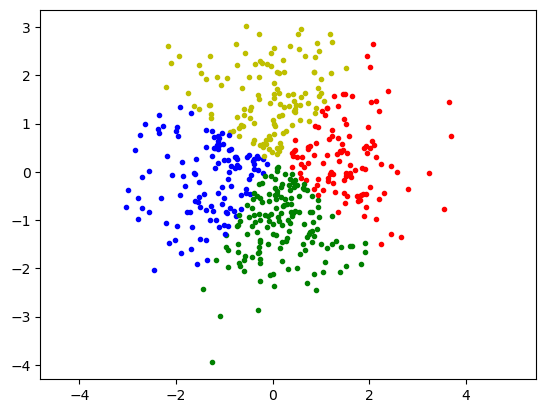

In [146]:
np.random.seed(12345)
K = 4                                       # number of clusters
M = np.zeros((data_size, K), dtype = bool)  # membership matrix
centroids = initialize_centroids()          # centroid array
k_means()                                   # k-means algorithm
plot_clusters()                             # plotting clusters